# Factorial Design

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-Factor-ANOVA" data-toc-modified-id="Two-Factor-ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two-Factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-Battery-Data" data-toc-modified-id="Load-Battery-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Battery Data</a></span></li><li><span><a href="#Model-fitting-and-ANOVA-table" data-toc-modified-id="Model-fitting-and-ANOVA-table-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model fitting and ANOVA table</a></span></li><li><span><a href="#Interaction-plot" data-toc-modified-id="Interaction-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interaction plot</a></span></li><li><span><a href="#Model-assumption-check" data-toc-modified-id="Model-assumption-check-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model assumption check</a></span></li><li><span><a href="#Tukey-HSD-Test-for-specific-factor-level" data-toc-modified-id="Tukey-HSD-Test-for-specific-factor-level-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Tukey HSD Test for specific factor level</a></span><ul class="toc-item"><li><span><a href="#Compute-margin-error-for-C.I." data-toc-modified-id="Compute-margin-error-for-C.I.-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Compute margin error for C.I.</a></span></li></ul></li><li><span><a href="#Your-Turn----Activity-II:-Missile-System-and-Propellant-Type" data-toc-modified-id="Your-Turn----Activity-II:-Missile-System-and-Propellant-Type-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Your Turn -- Activity II: Missile System and Propellant Type</a></span></li></ul></li><li><span><a href="#Three-factor-ANOVA" data-toc-modified-id="Three-factor-ANOVA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Three-factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-data-and-fit-model" data-toc-modified-id="Load-data-and-fit-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data and fit model</a></span></li><li><span><a href="#Main-and-interaction-effect-plots" data-toc-modified-id="Main-and-interaction-effect-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Main and interaction effect plots</a></span></li><li><span><a href="#Your-Turn----Activity-III:-Exercise-Tolerance" data-toc-modified-id="Your-Turn----Activity-III:-Exercise-Tolerance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Your Turn -- Activity III: Exercise Tolerance</a></span></li></ul></li></ul></div>

In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Two-Factor ANOVA

### Load Battery Data

In [2]:
import pandas as pd

battery_data = pd.read_excel('data/lect05-factorial.xlsx', 
                             sheet_name='Battery',header=0)
battery_data

,Lifetime,Material,Temp
0,130,M1,T015
1,155,M1,T015
2,74,M1,T015
3,180,M1,T015
4,34,M1,T070
5,40,M1,T070
6,80,M1,T070
7,75,M1,T070
8,20,M1,T125
9,70,M1,T125


### Model fitting and ANOVA table

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Lifetime ~ Material + Temp + Material:Temp'
mdl = ols(formula, data=battery_data).fit()
aov_table = anova_lm(mdl, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Material,2.0,10683.722222,5341.861111,7.911372,1.976083e-03
Temp,2.0,39118.722222,19559.361111,28.967692,1.908596e-07
Material:Temp,4.0,9613.777778,2403.444444,3.559535,1.861117e-02
Residual,27.0,18230.750000,675.212963,NaN,NaN


### Interaction plot

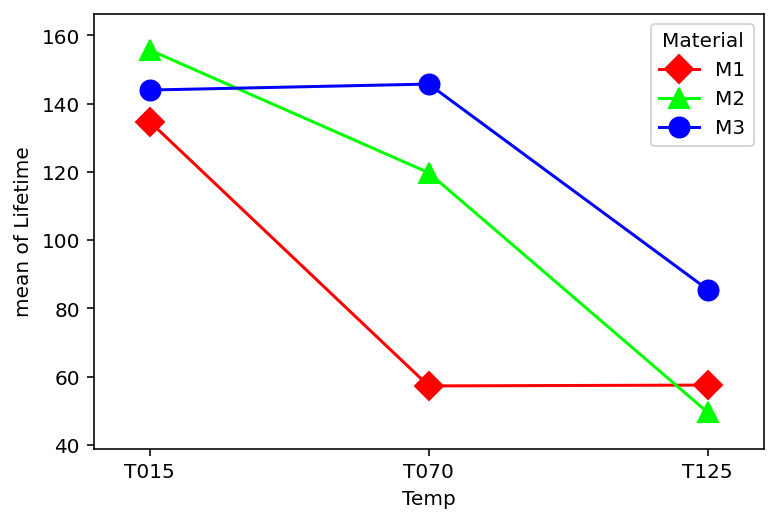

In [4]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(battery_data.Temp, 
                       battery_data.Material, 
                       battery_data.Lifetime, 
                       markers=['D','^','o'], ms=10) 

### Model assumption check

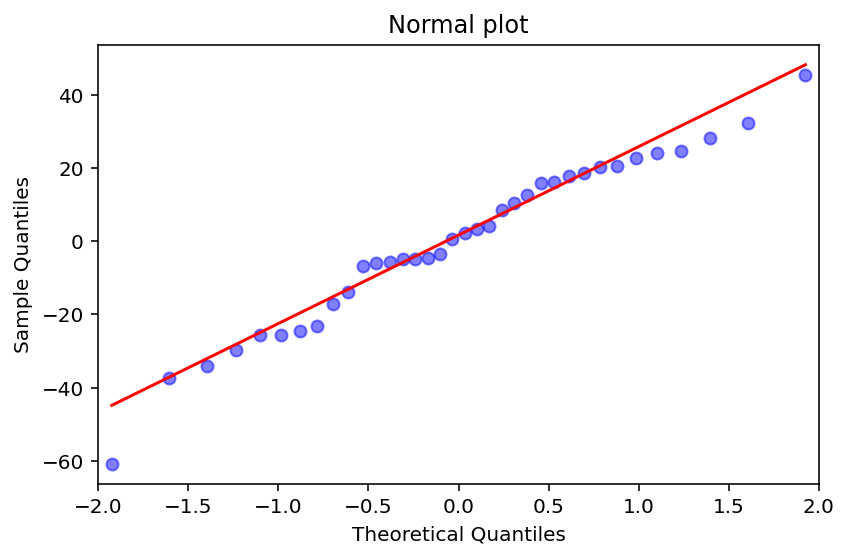

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

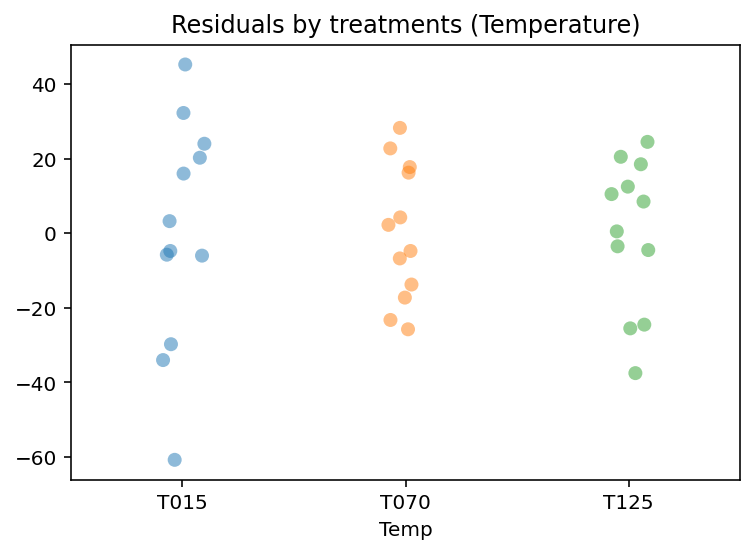

In [6]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Temp'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Temperature)')
pass;

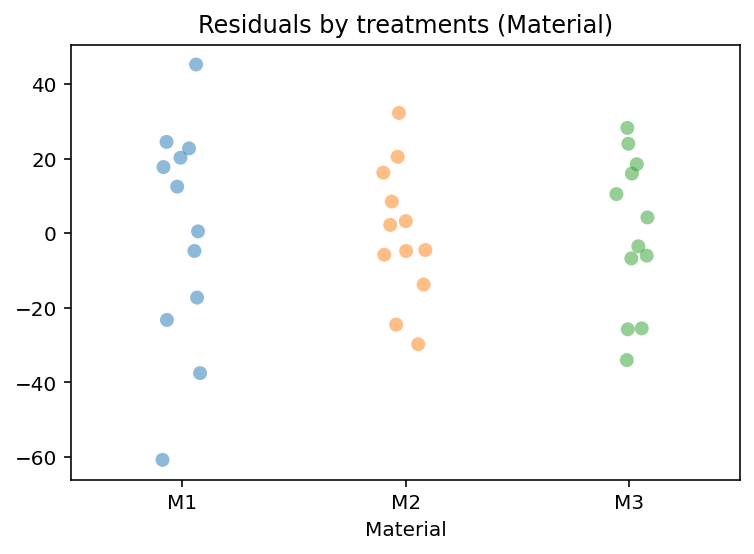

In [7]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Material'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Material)')
pass;

### Tukey HSD Test for specific factor level

#### Compute margin error for C.I.

In [8]:
from statsmodels.stats.libqsturng import qsturng

a = len(battery_data.Material.unique())
f = mdl.df_resid
n = battery_data.groupby(['Material','Temp']).count().reset_index().iloc[0,-1]

In [9]:
alpha=0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl.mse_resid/n)
print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 3.51
Margin error: 45.55


Compare the margin error to the mean differences to determine if the mean differences are significant.

###  Your Turn -- Activity II: Missile System and Propellant Type  

In [ ]:
missile_data = pd.read_excel('D:/HDS/CPE353 Design of Experiment/lecture 5/lect05-factorial.xlsx', 
                             sheet_name='Missile',header=0)
missile_data

In [ ]:
formula1 = 'BurningRate ~ System + Propellant + System:Propellant'
mdl1 = ols(formula1, data=missile_data).fit()
aov_table1 = anova_lm(mdl1, typ=1) 
aov_table1

### จากการทำ F-test และดูจากค่า p-value ทำให้เราทราบว่า System และ Propellant นั้นเป็นปัจจัยที่มีความ significant ต่อ BurningRate จากการที่ค่า p-value<0.05  และ สามารถทราบได้ว่า System และ Propellant นั้นไม่มี Interaction ต่อกัน หรืออาจจะมี Interaction เพียงเล็กน้อยจากการที่ค่า p-value > 0.05 มาจำนวนหนึ่ง ซึ่งเราสามารถดูกราฟ Interaction plot เพื่อดู interaction ระหว่าง combination ได้

In [ ]:
fig = interaction_plot(missile_data.System, 
                       missile_data.Propellant, 
                       missile_data.BurningRate, 
                       markers=['D','^','o', 's'], ms=10) 

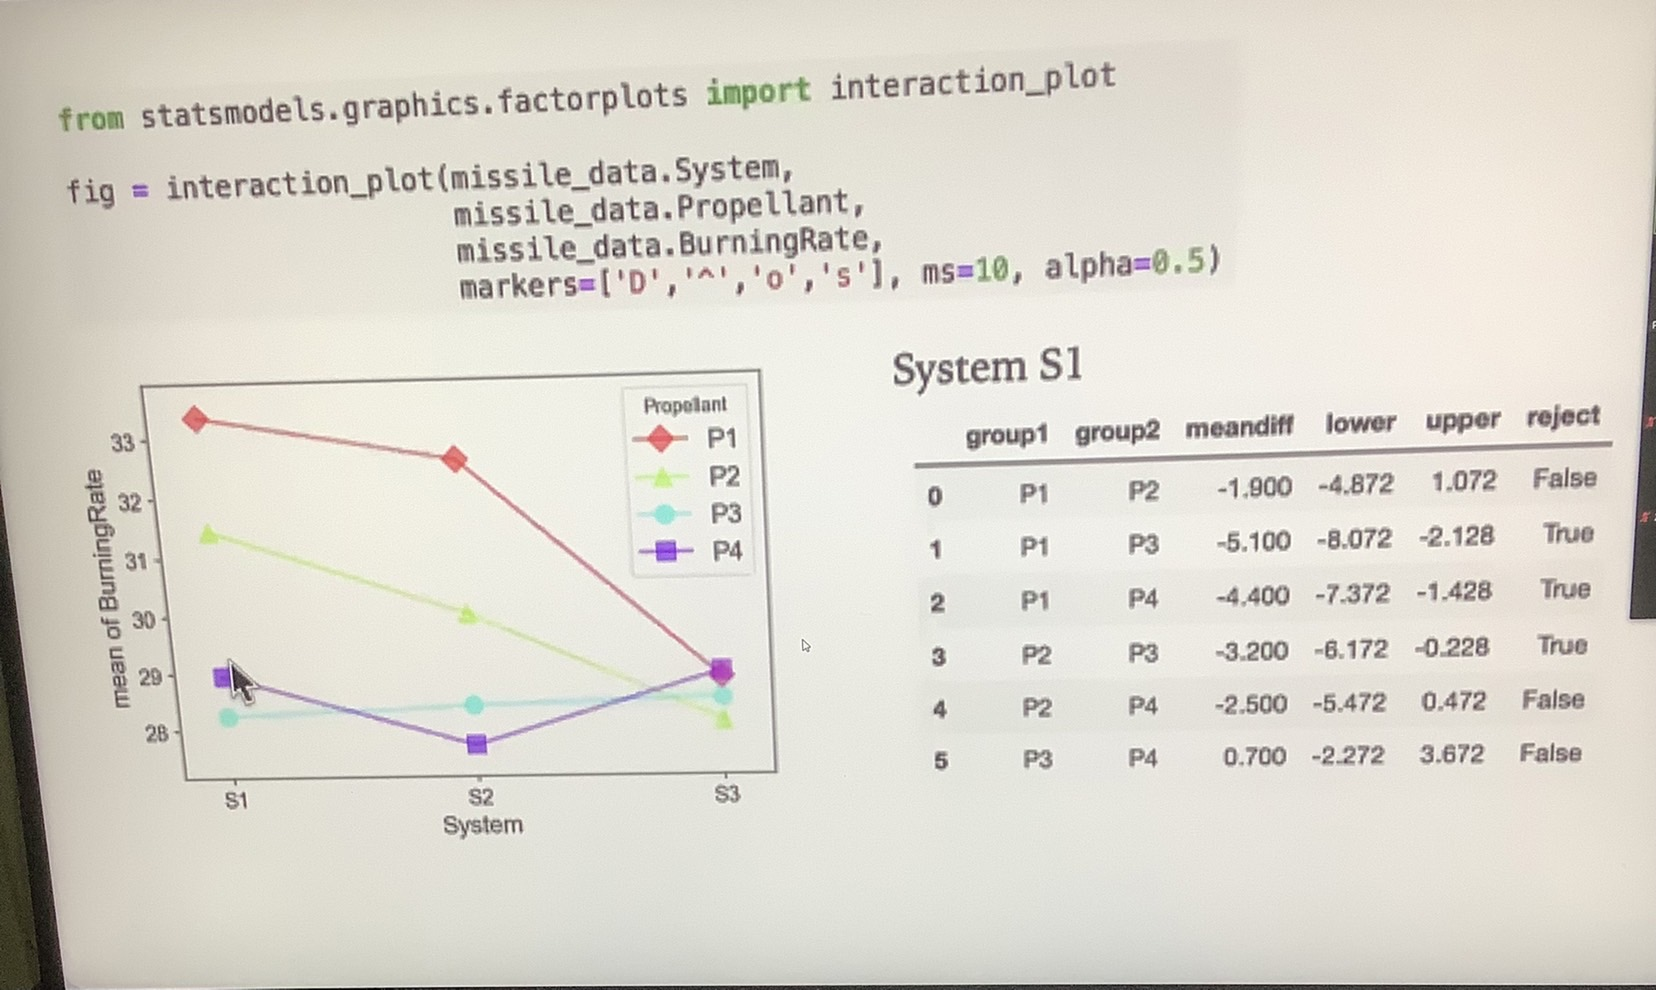

### จากการทำ Tukey test ทำให้เราพบว่า คู่ P1 P3, P1 P4 ,P2 P3 นั้นมี interaction ต่อกัน

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl1.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;

In [ ]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=missile_data['Propellant'], y=mdl1.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Propellant)')
pass;

In [ ]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=missile_data['System'], y=mdl1.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (System)')
pass;

## Three-factor ANOVA

### Load data and fit model

In [ ]:
softdrink_data = pd.read_excel('data/lect05-factorial.xlsx', sheet_name='Softdrink', header=0)
softdrink_data

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Filldeviation ~ C(Carbonation) + C(Pressure) + C(Linespeed) + C(Carbonation):C(Pressure) + \
C(Carbonation):C(Linespeed) + C(Pressure):C(Linespeed) + C(Carbonation):C(Pressure):C(Linespeed)'
mdl = ols(formula, data=softdrink_data).fit()
aov_table = anova_lm(mdl) 
aov_table

### Main and interaction effect plots

In [ ]:
## Create figure with four subplots inside
# Main effect plots of Carbonation, Pressure and Linespeed (ax1, ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(7,8)) 


carb_effect=softdrink_data.groupby('Carbonation').aggregate({'Filldeviation':'mean'}).reset_index()
ax1.plot(carb_effect.Carbonation.astype('str'), carb_effect.Filldeviation,
        ms=7, marker='o', alpha=0.7)
ax1.set_xlabel('Carbonation (A)')
ax1.set_ylabel('Average fill deviation')

### Your Turn: Try adding more plots on the figure
# Main effect plots of Pressure and Linespeed (ax2, ax3)  
# Carbonation-Pressure interaction plot (ax4)
# ..................
